# Load packages

In [1]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import minimize
from scipy.stats import gumbel_r
from matplotlib.pyplot import cm
import math
import matplotlib
import matplotlib.colors as mcolors
from scipy.optimize import fsolve

import sympy
from sympy import *
from sympy import symbols, Eq, solve
from shapely.geometry import LineString


%matplotlib inline
import warnings
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cmasher as cmr
# plt.style.use('ggplot')
import matplotlib.ticker as mtick
from scipy.stats import norm
from matplotlib import pyplot, transforms
from matplotlib.offsetbox import OffsetImage, AnnotationBbox



Input = 'Input18'
output = 'Output13'

colors2 = ['#6CC24A','#FFB81C', '#A50034'] # groen geel rood
colors4 = [ '#A50034', '#FFB81C', '#6CC24A'] # rood geel groen
colors = ['#0098FA', '#0167A9', '#002C48'] # blauw blauw blauw
c3 = ['#009B77', '#6CC24A', '#FFB81C', '#EC6842', '#A50034', '#6F1D77', '#EF60A3'] # groen groen geel oranjerood paarsrood paars roze
c4 = ['#6CC24A', '#FFB81C', '#EC6842', '#A50034', '#6F1D77'] # groen geel oranjerood paarsrood paars
colors5 = ['#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034'] # donkergroen groen geel oranje rood

# Load data

In [2]:
GB = pd.read_csv(f'GB.csv', index_col=0)
USA = pd.read_csv(f'USA.csv', index_col=0)
FR = pd.read_csv(f'FR.csv', index_col=0)
BE = pd.read_csv(f'BE.csv', index_col=0)

datasets = [GB, USA, BE, FR]
dataset_names = ['CAMELS GB', 'CAMELS USA', 'Meuse', 'Meuse']
dataset_names_complete = ['CAMELS GB', 'CAMELS USA', 'Meuse BE', 'Meuse FR']
colorsTU = ['#FFB81C', '#00B8C8', '#6F1D77','#6F1D77']

yrsl_GB = ['1971 - 1980', '1981 - 1990', '1991 - 2000', '2001 - 2010']
yrsl_USA = ['1981 - 1989', '1990 - 1999', '2000 - 2009']
yrsl_be = ['1996 - 2005', '2006 - 2015']
yrsl_fr = ['1986 - 1995', '1996 - 2005', '2006 - 2015']


yrsls = [yrsl_GB, yrsl_USA, yrsl_be, yrsl_fr]

display(FR)
display(BE)
display(USA)
display(GB['EI deviation 2001 - 2010'])

FR.keys()

,system_index,AI,EI,Sr,Pa,Epa,T,is_dur,ST,SI,...,AI_change 2006 - 2015,SI_change 2006 - 2015,is_dur_change 2006 - 2015,ST_change 2006 - 2015,Sr expected 1996 - 2005,Sr expected 2006 - 2015,Sr deviation 1996 - 2005,Sr relative 1996 - 2005,Sr deviation 2006 - 2015,Sr relative 2006 - 2015
catchment,,,,,,,,,,,,,,,,,,,,,
La Meuse Goncourt,0000000000000000002b,0.752223,0.595866,212.865608,874.545701,657.853659,10.137787,4.068759,0.035767,0.102071,...,0.027756,0.017953,-0.061998,0.081099,231.326844,148.101767,-25.625983,-0.124579,-3.565884,-0.024671
Le Mouzon Circourt-sur-Mouzon [Villars],0000000000000000002a,0.737932,0.589832,206.153524,884.167132,652.455515,10.034736,4.085000,0.050135,0.098980,...,0.049425,0.019299,0.050403,0.062989,227.478063,146.718949,-6.765111,-0.030651,-26.791897,-0.223402
Le Vair Soulosse-sous-Saint-Élophe,00000000000000000029,0.739985,0.591373,204.842276,875.655097,647.971999,10.011825,4.086870,0.048127,0.099307,...,0.072286,0.025083,0.138944,0.085308,206.137265,134.293316,1.349226,0.006503,-23.485127,-0.211944
La Meuse Saint-Mihiel,00000000000000000028,0.756448,0.537656,161.677726,855.396583,647.062926,10.098485,4.062438,0.041661,0.095317,...,0.057867,0.028514,0.128159,0.078629,147.004713,120.834774,23.480891,0.137729,-3.763796,-0.032150
La Meuse Stenay,00000000000000000027,0.740743,0.491502,136.127009,860.385843,637.324728,10.075841,4.014099,0.042083,0.094056,...,0.061109,0.027708,0.327511,0.017336,152.039690,125.461679,12.814959,0.077735,-10.272303,-0.089178
Le Loison Han-lés-Juvigny,00000000000000000026,0.671355,0.606348,259.431829,911.828588,612.160943,10.027162,4.075280,0.035883,0.106944,...,0.073676,-0.006811,0.033054,-0.029134,251.647482,237.733270,-1.781293,-0.007129,-58.336304,-0.325180
La Bar Cheveuges,00000000000000000023,0.622561,0.584906,267.844657,964.243629,600.300556,9.791106,4.015129,0.061665,0.140137,...,0.040631,0.007153,-0.084691,0.004441,221.813675,228.178630,-4.705315,-0.021673,-6.653422,-0.030035
La Vence la Francheville,0000000000000000001c,0.557612,0.454026,185.448285,1061.149090,591.709248,9.501375,4.009068,0.066413,0.168279,...,0.039790,-0.000267,-0.157813,-0.006082,107.457450,198.790075,62.636539,0.368247,-34.356453,-0.208938


,system_index,AI,EI,Sr,Pa,Epa,T,ST,is_dur,SI,...,Pa_change 2006 - 2015,Epa_change 2006 - 2015,T_change 2006 - 2015,AI_change 2006 - 2015,SI_change 2006 - 2015,is_dur_change 2006 - 2015,ST_change 2006 - 2015,Sr expected 2006 - 2015,Sr deviation 2006 - 2015,Sr relative 2006 - 2015
catchment,,,,,,,,,,,,,,,,,,,,,
Membre Pont,00000000000000000019,0.532849,0.434162,158.552656,1206.100193,601.947681,9.560951,0.049117,3.810764,0.199982,...,-124.422910,14.769006,0.413976,0.063636,-0.009980,-0.074189,0.010269,211.056012,-61.953371,-0.415508
Treignes,00000000000000000015,0.647399,0.547112,178.185446,943.714744,592.318559,9.211433,0.026791,3.687279,0.201586,...,-23.160244,19.254784,0.367323,0.035799,0.027491,-0.147700,0.011936,178.177572,-21.387819,-0.136411
Chooz,00000000000000000020,0.679134,0.523281,175.199838,967.932187,626.992954,9.555951,0.066706,3.815331,0.163252,...,-70.349238,11.291679,0.324279,0.058738,-0.003278,0.035647,0.018342,174.530290,-33.007338,-0.233230
Jemelle,00000000000000000013,0.625560,0.487600,162.435307,1012.748674,590.759194,9.954299,0.030928,3.720430,0.158975,...,-103.075719,17.798387,0.359267,0.077097,0.054678,-0.141550,0.086189,227.551233,-81.511828,-0.558150
Hastiere,0000000000000000000d,0.745116,0.618520,152.829310,807.738569,593.142818,9.027858,0.038545,3.657343,0.177006,...,2.135548,14.969007,0.108832,0.016569,0.057259,-0.050500,0.014044,177.229341,-2.764223,-0.015844
Warnant,00000000000000000009,0.746523,0.632127,134.490129,811.877370,588.695299,9.848904,0.034198,3.927562,0.167290,...,-17.461185,17.169194,0.116469,0.036777,0.069628,-0.058765,0.001723,176.790634,10.437806,0.055749
Wiheries,0000000000000000000c,0.738507,0.569325,146.383990,837.561793,587.953494,9.754699,0.020679,3.878735,0.174853,...,-39.034238,27.573922,0.586198,0.065855,0.048186,-0.024164,0.021672,159.011682,-18.001792,-0.127663
Huccorgne,00000000000000000002,0.813393,0.737316,230.994460,767.910339,587.320666,9.716711,0.071574,4.000000,0.155919,...,-61.975701,16.689256,-0.089096,0.084122,0.091346,0.054945,0.095392,278.380493,-17.708339,-0.067933
Amay,00000000000000000014,0.675709,0.561681,205.445610,940.186047,603.487299,10.294282,0.044744,4.000000,0.200670,...,-68.204519,15.566437,0.323443,0.063127,0.017610,0.013506,0.000042,220.135636,-40.634192,-0.226373


,AI,EI,Sr,SI,Pa,Epa,T,ST,is_dur,AI 1981 - 1989,...,AI_change 2000 - 2009,SI_change 2000 - 2009,is_dur_change 2000 - 2009,ST_change 2000 - 2009,Sr expected 1990 - 1999,Sr expected 2000 - 2009,Sr deviation 1990 - 1999,Sr relative 1990 - 1999,Sr deviation 2000 - 2009,Sr relative 2000 - 2009
1411300,0.794058,0.612706,233.865141,0.159123,1137.278929,903.065191,12.699504,0.084290,4.564516,0.819113,...,-0.007323,-0.025450,0.197318,0.088543,185.402347,245.939897,19.756732,0.096300,58.376275,0.191828
1484100,0.777149,0.665483,274.155304,0.146154,1179.074286,916.316980,13.569895,0.072025,4.273908,0.835441,...,-0.032351,-0.020261,0.318066,0.091399,221.150228,284.033360,-6.310131,-0.029371,37.923203,0.117790
1485500,0.798881,0.655936,283.912955,0.153207,1171.140357,935.601227,13.988244,-0.048397,4.332936,0.815095,...,-0.025166,-0.012317,0.226516,0.145937,289.516852,301.719510,-6.326578,-0.022340,24.467118,0.075010
1486000,0.818090,0.670349,290.117346,0.151163,1179.832143,965.209000,14.213740,-0.024406,4.325816,0.833438,...,-0.037966,-0.014257,0.189554,0.217929,328.118588,288.663833,-48.745622,-0.174482,27.416478,0.086739
1487000,0.777241,0.639556,250.916376,0.145373,1184.655000,920.762775,13.677894,0.066572,4.306548,0.828433,...,-0.032813,-0.016149,0.293061,0.141002,226.502626,271.994944,-8.606587,-0.039499,-2.020002,-0.007482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346045,0.846883,0.750962,506.985922,0.283128,1277.878929,1082.214089,18.017034,-0.033905,5.922137,0.886554,...,0.032779,0.069173,-0.107956,-0.068019,476.156685,418.096992,-31.412282,-0.070630,135.561271,0.244846
7362100,0.772755,0.710034,449.941119,0.272100,1371.758929,1060.033446,17.232930,-0.045637,5.148047,0.797570,...,0.029764,0.032585,0.249411,-0.007164,385.630674,365.731354,10.911608,0.027517,69.259225,0.159220
8082700,1.731448,0.956649,368.835366,0.309395,670.508929,1160.951475,17.673889,0.358049,9.347027,1.755694,...,-0.007561,0.075458,0.365277,0.048467,354.464296,351.740476,5.204356,0.014470,-2.207381,-0.006315
8086212,1.701542,0.954228,439.190278,0.281167,683.416429,1162.861531,17.888555,0.329170,8.832124,1.855090,...,-0.002141,0.141925,0.391171,0.219803,329.272954,334.499458,-1.671047,-0.005101,40.364783,0.107678


KeyError: 'EI deviation 2001 - 2010'

# 1. Normal Budyko plot

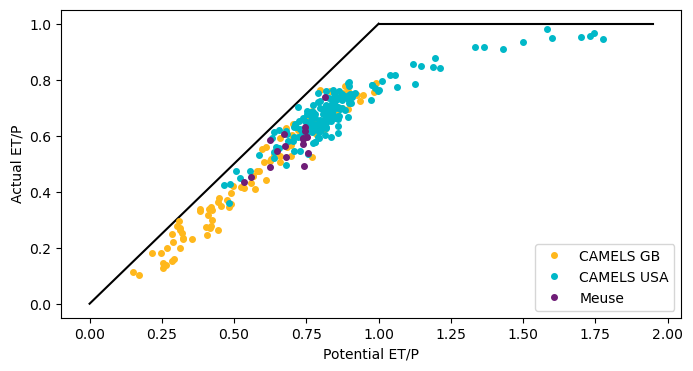

In [3]:
plt.figure(figsize=(8,4))

budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
# plt.minorticks_on()
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        plt.plot(AI, EI, marker='.', c = colorsTU[u], alpha=1, markersize = 8)

legend_el = [Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[0], markerfacecolor=colorsTU[0], label=dataset_names[0], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[1], markerfacecolor=colorsTU[1], label=dataset_names[1], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = colorsTU[2], markerfacecolor=colorsTU[2], label=dataset_names[2], markersize = 8)]

plt.legend(handles=legend_el, loc='lower right')


plt.savefig(f'2_Output/{output}/1_Budyko_normal_v1.png')   

# 2. Plot Sr values in Budyko

## Total time period

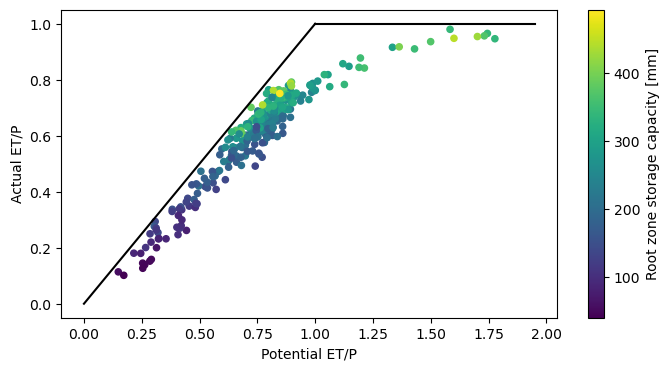

In [4]:
plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
# plt.minorticks_on()
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

AI_total = []
EI_total = []
Sr_total = []

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        Sr = dataset.iloc[i]['Sr']
        
        AI_total.append(AI)
        EI_total.append(EI)
        Sr_total.append(Sr)
        
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='viridis', s=20)
plt.colorbar(label='Root zone storage capacity [mm]')    
    
plt.savefig(f'2_Output/{output}/2_Budyko_colored_Sr.png')   

## Sr deviations per decade (per dataset)

In [5]:
for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            AI_total = []
            EI_total = []
            Sr_total = []
            fig = plt.figure(figsize=(6,3.5))
            # fig.set_facecolor('xkcd:mint green')
            budyko_curve_x = np.arange(1, 2, 0.05)
            energy_limit_x = np.arange(0, 1.0001, 0.05)
            x = np.arange(0, 1.0001, 0.05)
            water_limit_y = 1 + budyko_curve_x*0
            energy_limit_y = energy_limit_x
            y = 1 + x*0
            plt.ylabel("Actual ET/P")
            plt.xlabel("Potential ET/P")
            plt.plot(energy_limit_x, energy_limit_y, c='k')
            plt.plot(budyko_curve_x, water_limit_y,c='k')
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']        
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev)
                
            cmap = cmr.prinsenvlag
            plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=40)
            plt.colorbar(label='Error in estimating root zone storage capacity [mm]')#, vmin=-80, vmax = 150)   
            plt.clim(-150, 150)
            plt.title(f'{dataset_names_complete[u]}, {yrsl[j]}')
    
            plt.savefig(f'2_Output/{output}/2_Deviation_Sr_{dataset_names_complete[u]}, {yrsl[j]}.png')   
            plt.close(fig)

## Sr deviations combined

-86.13869676948536 146.81927930258848


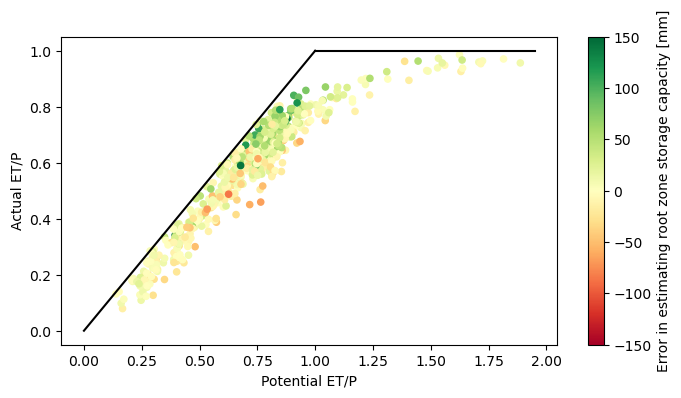

In [6]:
AI_total = []
EI_total = []
Sr_total = []

fig = plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

min_dev = 0
max_dev = 0

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']        
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev)
                if Sr_dev > max_dev:
                    max_dev = Sr_dev
                if Sr_dev < min_dev:
                    min_dev = Sr_dev
                
cmap = cmr.pride
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=20)
plt.colorbar(label='Error in estimating root zone storage capacity [mm]')   
# plt.title(f'Sr deviations total')
plt.clim(-150, 150)    
plt.savefig(f'2_Output/{output}/2_Deviation_Sr_all.png')   

print(min_dev, max_dev)

## Sr deviations relative per decade (per dataset)

In [7]:
for u in range(len(datasets)):
    dataset = datasets[u]
    print(dataset_names[u])
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            AI_total = []
            EI_total = []
            Sr_total = []
            fig = plt.figure(figsize=(6,3.5))
            # fig.set_facecolor('xkcd:mint green')
            budyko_curve_x = np.arange(1, 2, 0.05)
            energy_limit_x = np.arange(0, 1.0001, 0.05)
            x = np.arange(0, 1.0001, 0.05)
            water_limit_y = 1 + budyko_curve_x*0
            energy_limit_y = energy_limit_x
            y = 1 + x*0
            plt.ylabel("Actual ET/P")
            plt.xlabel("Potential ET/P")
            plt.plot(energy_limit_x, energy_limit_y, c='k')
            plt.plot(budyko_curve_x, water_limit_y,c='k')
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']*100
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev_rel)
                
            cmap = cmr.prinsenvlag
            plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=40)
            plt.colorbar(label='Error in estimating root zone storage capacity', format='%.0f%%')   
            plt.clim(-100, 100)
            plt.title(f'{dataset_names_complete[u]}, {yrsl[j]}')
    
            plt.savefig(f'2_Output/{output}/2_Relative_Deviation_Sr_{dataset_names_complete[u]}, {yrsl[j]}.png')   
            plt.close(fig)

CAMELS GB
CAMELS USA
Meuse
Meuse


## Sr deviations combined relative

-37.087846942750446 0


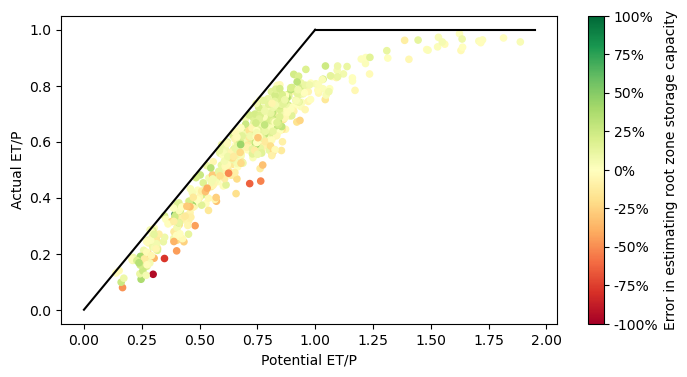

In [8]:
AI_total = []
EI_total = []
Sr_total = []

fig = plt.figure(figsize=(8,4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Actual ET/P")
plt.xlabel("Potential ET/P")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

min_dev = 0
max_dev = 0

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']*100
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev_rel)
                if Sr_dev > max_dev:
                    max_dev = Sr_dev
                if Sr_dev < min_dev:
                    min_dev = Sr_dev
                
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='RdYlGn', s=20)
plt.colorbar(label='Error in estimating root zone storage capacity', format='%.0f%%')   
plt.clim(-100, 100)
plt.savefig(f'2_Output/{output}/2_Relative_Deviation_Sr_all.png')   

print(min_dev, max_dev)

# 3. Budyko with ranges

In [9]:
def w_function(AI, w):
    EI = 1 + AI - (1 + (AI**w))**(1/w)
    return EI

## Arrays maken van EI, AI en EI_dev (en nu ook Sr)

In [10]:
nr = 11

nrs = np.linspace(0, 2, nr)

EI_mean_total = [[], [], [], [], [], [], [], [], [], []]
AI_mean_total = [[], [], [], [], [], [], [], [], [], []]
EI_dev_total = [[], [], [], [], [], [], [], [], [], []]
Sr_dev_total = [[], [], [], [], [], [], [], [], [], []]
Sr_dev_rel_total = [[], [], [], [], [], [], [], [], [], []]


for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']  
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']  
                
                
                for n in range(len(nrs)):
                    if nrs[n] <= AI < nrs[n+1]:
                        EI_mean_total[n].append(EI)
                        EI_dev_total[n].append(EI_dev)
                        AI_mean_total[n].append(AI)
                        Sr_dev_total[n].append(Sr_dev)
                        Sr_dev_rel_total[n].append(Sr_dev_rel)
                        
EI_mean = np.zeros(nr-1)
AI_mean = np.zeros(nr-1)

for n in range(len(EI_mean_total)):
    EI_mean[n] = np.mean(EI_mean_total[n])
    AI_mean[n] = np.mean(AI_mean_total[n])

## Plotjes maken van EI_dev per groep en opslaan

In [11]:
n_working = []
c = 0
for n in range(len(EI_dev_total)):
    fig, axs = plt.subplots(1, 1)
    fig.set_figheight(12.5)
    fig.set_figwidth(4)

    EI_dev = EI_dev_total[n]
    
    EI_dev_neg = []
    EI_dev_pos = []
    
    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
            
    length = len(EI_dev)

    if length > 10:
        plt.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        plt.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        plt.ylim(-0.2, 0.2)
        axs.get_xaxis().set_visible(False)
        axs.get_yaxis().set_visible(False)
        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)
        axs.spines['bottom'].set_visible(False)
        axs.spines['left'].set_visible(False)
        frameon=False
        plt.savefig(f'2_Output/{output}/3_EI_dev_{n}.png', transparent=True)  
        n_working.append(n)
        c += 1

    plt.close()

## Budyko summary plot EI deviations (originele formaat)

72
94
236
192


C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_20012\3930593306.py:51: RuntimeWarning: divide by zero encountered in divide
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)
C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_20012\3930593306.py:51: RuntimeWarning: overflow encountered in power
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)


24


<Figure size 2200x1600 with 0 Axes>

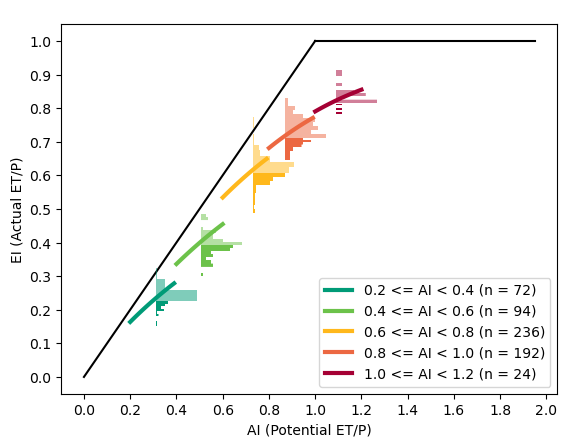

In [12]:
fig = plt.figure(figsize=(22,16))
fig, ax = plt.subplots()
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("EI (Actual ET/P)")
plt.xlabel("AI (Potential ET/P)")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
# ax.yaxis.grid(color='gray', linestyle='dashed')
# ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_yticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# ax.set_xticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
ax.set_xticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])



def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.1)

AI_working = []
AI_graph = []
EI_working = []
paths = []
c=0

for n in (n_working):
    EI = float(EI_mean[n])
    AI = float(AI_mean[n])
    AI_plus = AI+0.1
    
    AI_working.append(AI)
    AI_graph.append(AI_plus)
    EI_working.append(EI)
    
    n_dev = len(EI_dev_total[n]) 
    print(n_dev)
        
    label = f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {n_dev})'

    # plt.plot(AI, EI, 'o', color=colors5[c])
    

    # solve normal
    
    EI_line = np.linspace(EI, EI, 100000)
    w_array = np.linspace(0, 15, 100000)
    Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)

    first_line = LineString(np.column_stack((w_array, EI_line)))
    second_line = LineString(np.column_stack((w_array, Eq_tosolve)))
    intersection = first_line.intersection(second_line)

    w = intersection.x
    
    # plot w function
    AI_array = np.arange(nrs[n], nrs[n+1], 0.01)
    # AI_array = np.arange(0, 2, 0.05)
    EI_out = w_function(AI_array, w)
    plt.plot(AI_array, EI_out, linewidth = 3, label = label, color=colors5[c])
    
    paths.append(f'2_Output/{output}/3_EI_dev_{n}.png')
    c+=1
    
    
for x0, y0, path in zip(AI_graph, EI_working, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)


plt.legend(loc = 'lower right')
plt.savefig(f'2_Output/{output}/3_Budyko_image_EI_deviations.png')  

## Budyko summary plot EI deviations (nieuw formaat)

72
94
236
192


C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_20012\3695589763.py:46: RuntimeWarning: divide by zero encountered in divide
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)
C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_20012\3695589763.py:46: RuntimeWarning: overflow encountered in power
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)


24


<Figure size 200x800 with 0 Axes>

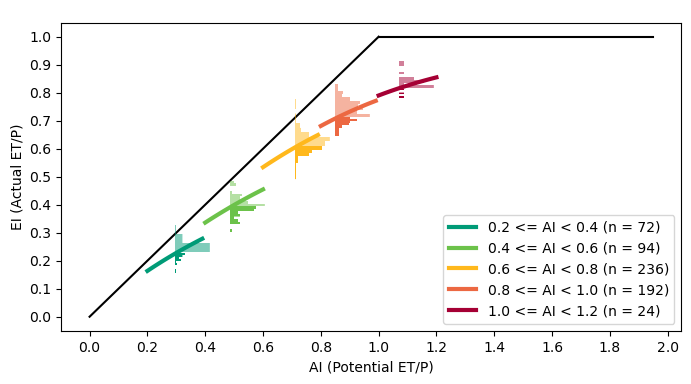

In [13]:
fig = plt.figure(figsize=(2,8))
fig, ax = plt.subplots(figsize=(8, 4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("EI (Actual ET/P)")
plt.xlabel("AI (Potential ET/P)")
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
# ax.yaxis.grid(color='gray', linestyle='dashed')
# ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_yticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])



def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.083)

AI_working = []
AI_graph = []
EI_working = []
paths = []
c=0

for n in (n_working):
    EI = float(EI_mean[n])
    AI = float(AI_mean[n])
    AI_plus = AI+0.05
    
    AI_working.append(AI)
    AI_graph.append(AI_plus)
    EI_working.append(EI)
    
    n_dev = len(EI_dev_total[n]) 
    print(n_dev)
        
    label = f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {n_dev})'

    
    EI_line = np.linspace(EI, EI, 100000)
    w_array = np.linspace(0, 15, 100000)
    Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)

    first_line = LineString(np.column_stack((w_array, EI_line)))
    second_line = LineString(np.column_stack((w_array, Eq_tosolve)))
    intersection = first_line.intersection(second_line)

    w = intersection.x
    
    # plot w function
    AI_array = np.arange(nrs[n], nrs[n+1], 0.01)
    EI_out = w_function(AI_array, w)
    plt.plot(AI_array, EI_out, linewidth = 3, label = label, color=colors5[c])
    
    paths.append(f'2_Output/{output}/3_EI_dev_{n}.png')
    c+=1
    
    
for x0, y0, path in zip(AI_graph, EI_working, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)


plt.legend(loc = 'lower right')
plt.savefig(f'2_Output/{output}/3_Budyko_image_EI_deviations.png')  

### Plotjes EI_dev met details (5 aparte)

In [14]:
n_working = []
c = 0
for n in range(len(EI_dev_total)):
    fig, axs = plt.subplots(1, 1)
    fig.set_figheight(9.371)
    fig.set_figwidth(3)

    EI_dev = EI_dev_total[n]
    
    EI_dev_neg = []
    EI_dev_pos = []
    
    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
            
    length = len(EI_dev)

    if length > 10:
        plt.title(f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {length})')
        plt.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        plt.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        plt.ylim(-0.2, 0.2)
        # axs.get_xaxis().set_visible(False)
        # axs.get_yaxis().set_visible(False)
        # axs.spines['top'].set_visible(False)
        # axs.spines['right'].set_visible(False)
        # axs.spines['bottom'].set_visible(False)
        # axs.spines['left'].set_visible(False)
        frameon=False
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        
        mu = np.mean(EI_dev)
        p10 = np.percentile(EI_dev, 10)
        # p50 = np.percentile(EI_dev, 50)
        p90 = np.percentile(EI_dev, 90)
        
        plt.axhline(mu, color='grey', linewidth=2)
        plt.axhline(p10, color='grey', linewidth=2, linestyle='--')
        plt.axhline(p90, color='grey', linewidth=2, linestyle='--')

        

        
        # textstr = f'mean = {mu:.1} \n90th percentile = {p90:.1} \n50th percentile = {p50:.1} \n10th percentile = {p10:.1}'
        textstr = f'mean = {mu:.1} \n90th percentile = {p90:.1} \n10th percentile = {p10:.1}'

        
        
        # place a text box in upper left in axes coords
        axs.text(-0.05, 0.38, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
        
        plt.savefig(f'2_Output/{output}/3_EI_dev_details_nr{n}.png', transparent=False)  
        n_working.append(n)
        c += 1

    plt.close()

### Plotjes EI_dev met details (1 plaatjes)

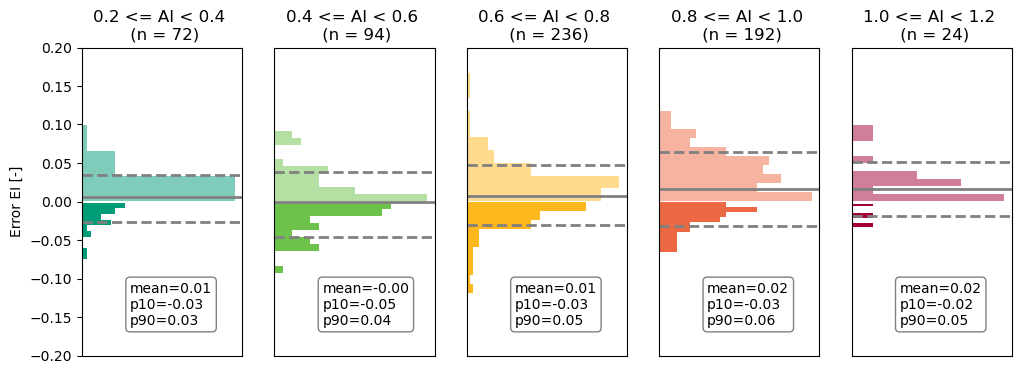

In [15]:
fig, axs = plt.subplots(1, 5)
fig.set_figheight(4)
fig.set_figwidth(12)
c = 0
for n in range(len(EI_dev_total)):
    EI_dev = EI_dev_total[n]
    EI_dev_neg = []
    EI_dev_pos = []

    mu = np.mean(EI_dev)
    p10 = np.percentile(EI_dev, 10)
    p90 = np.percentile(EI_dev, 90)

    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
    length = len(EI_dev)
    if length > 10:
        ax = axs[c]
        ax.set_title(f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} \n (n = {length})')
        ax.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        ax.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        ax.set_ylim(-0.2, 0.2)

        ax.axhline(mu, color='grey', linewidth=2)
        ax.axhline(p10, color='grey', linewidth=2, linestyle='--')
        ax.axhline(p90, color='grey', linewidth=2, linestyle='--')
        
        ax.annotate(f"mean={mu:.2f}\np10={p10:.2f}\np90={p90:.2f}", (0.3, 0.1), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))

        # code for formatting and adding text
        if c != 0:
            ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        if c == 0:
            ax.set_ylabel('Error EI [-]')
        c += 1
plt.savefig(f'2_Output/{output}/3_EI_dev_details_nr.png', transparent=False)


## Violin plots in one image (WORKING)

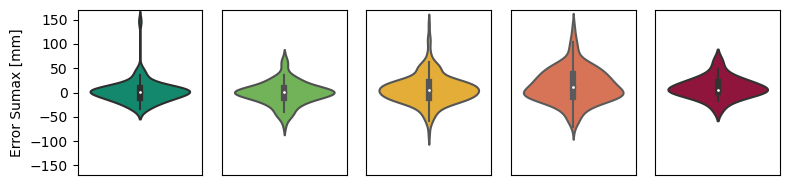

In [20]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(8, 2))

c = 0
for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    length = len(Sr_dev)
    if length > 10:
        sns.violinplot(Sr_dev, ax=axs[c], color=colors5[c])
        axs[c].set_ylim(-170, 170)
        axs[c].set_ylabel('Error Sumax [mm]')
        axs[c].set_xticks([])
        axs[c].set_yticks([-150, -100, -50, 0, 50, 100, 150])
        if c != 0:
            axs[c].yaxis.set_visible(False)
            # axs[c].spines['top'].set_visible(False)
            # axs[c].spines['right'].set_visible(False)
            # axs[c].spines['bottom'].set_visible(False)
            # axs[c].spines['left'].set_visible(False)
        n_working.append(n)
        c += 1

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin.png', transparent=True)  
plt.tight_layout()


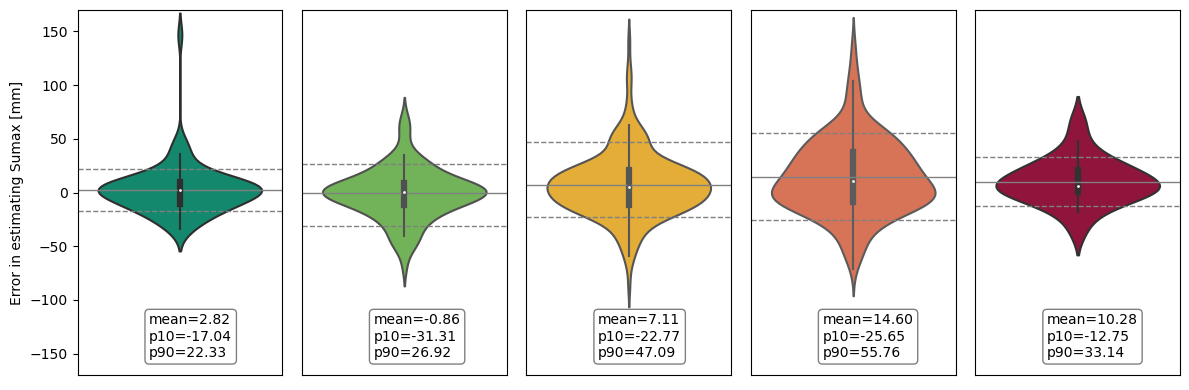

In [17]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

c = 0
for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    length = len(Sr_dev)
    
    mu = np.mean(Sr_dev)
    p10 = np.percentile(Sr_dev, 10)
    p90 = np.percentile(Sr_dev, 90)
    
    if length > 10:
        sns.violinplot(Sr_dev, ax=axs[c], color=colors5[c]) 
        axs[c].set_ylim(-170, 170)
        axs[c].set_ylabel('Error in estimating Sumax [mm]')
        axs[c].set_xticks([])
        axs[c].set_yticks([-150, -100, -50, 0, 50, 100, 150])
        
        axs[c].axhline(mu, color='grey', linewidth=1)
        axs[c].axhline(p10, color='grey', linewidth=1, linestyle='--')
        axs[c].axhline(p90, color='grey', linewidth=1, linestyle='--')
        axs[c].annotate(f"mean={mu:.2f}\np10={p10:.2f}\np90={p90:.2f}", (0.35, 0.05), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))


        if c != 0:
            axs[c].yaxis.set_visible(False)
        n_working.append(n)
        c += 1
    

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin.png', transparent=True)  
plt.tight_layout()


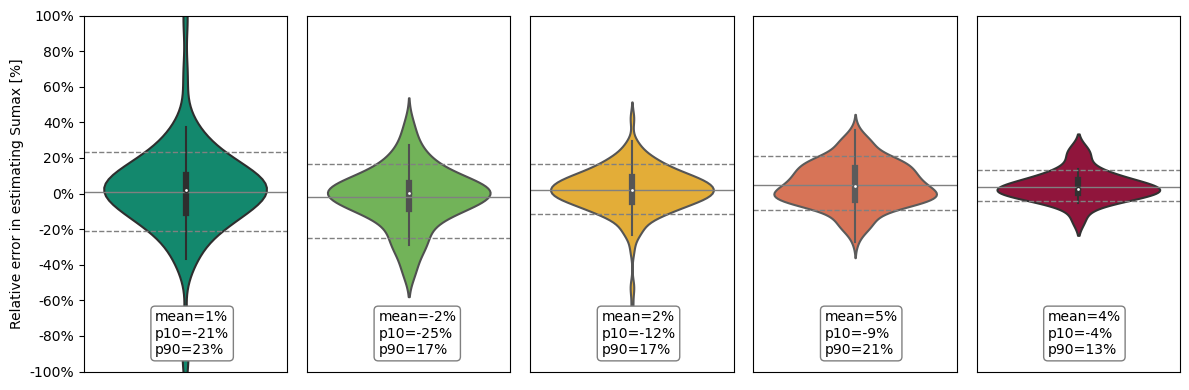

In [18]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

c = 0
for n in range(len(Sr_dev_rel_total)):
    Sr_dev_rel = Sr_dev_rel_total[n]
    length = len(Sr_dev_rel)
    
    mu = np.mean(Sr_dev_rel)
    p10 = np.percentile(Sr_dev_rel, 10)
    p90 = np.percentile(Sr_dev_rel, 90)
    
    if length > 10:
        sns.violinplot(Sr_dev_rel, ax=axs[c], color=colors5[c]) 
        axs[c].set_ylim(-1, 1)
        axs[c].set_ylabel('Relative error in estimating Sumax [%]')
        axs[c].set_xticks([])
        
        axs[c].axhline(mu, color='grey', linewidth=1)
        axs[c].axhline(p10, color='grey', linewidth=1, linestyle='--')
        axs[c].axhline(p90, color='grey', linewidth=1, linestyle='--')
        axs[c].annotate(f"mean={mu:.0%}\np10={p10:.0%}\np90={p90:.0%}", (0.35, 0.05), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))
        axs[c].set_yticks(np.linspace(-1, 1, 11))
        axs[c].set_yticklabels(['-100%', '-80%', '-60%', '-40%', '-20%', '0%', '20%', '40%', '60%', '80%', '100%'])
        if c != 0:
            axs[c].yaxis.set_visible(False)
        n_working.append(n)
        c += 1
    

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin_rel.png', transparent=True)  
plt.tight_layout()
